# <b>Chapter 7.1 _ Keras _ Who surived form Titanic? </b>
<font color="red"><b>(Kaggle Competition)</b></font><br>
<font color="blue"><b>By Farhad Shadmand ([github](https://github.com/farhadsh1992))</b></font>

<font size=8><b>First _ Machine learning

# import def fot model

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



from farhad_DL.utility import missing_median, missing_default,missing_maxitration

In [54]:
import pandas as pd
df_train= pd.read_csv("data/Chapter7/Chapter7.1-titanic/train.csv", na_values=["NA","?"," "])
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_test = pd.read_csv("data/Chapter7/Chapter7.1-titanic/test.csv", na_values=["NA","?"])
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [13]:
def check_nan(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum()/df.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    print(missing_data.head())
    
    
check_nan(df_train)

          Total     %
Cabin       687  77.1
Age         177  19.9
Embarked      2   0.2
Fare          0   0.0
Ticket        0   0.0


Text(0.5, 1.0, 'Male')

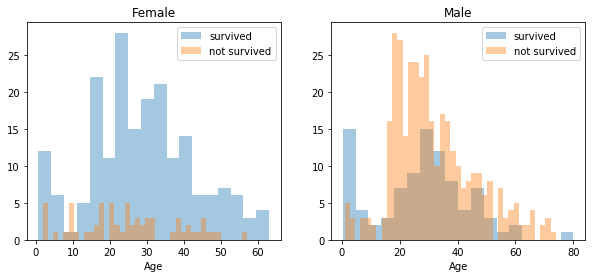

In [16]:
import seaborn as sns
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

men = df_train[df_train.Sex == 'male']
women = df_train[df_train.Sex == 'female']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18,
                  label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),
                  bins=40, label = not_survived, ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), 
                  bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), 
                  bins=40, label = not_survived, ax = axes[1], kde = False)

ax.legend()
ax.set_title('Male')

In [18]:
men[men['Survived']==1].std()

PassengerId    244.717482
Survived         0.000000
Pclass           0.922774
Age             16.504803
SibSp            0.636952
Parch            0.645826
Fare            71.355967
dtype: float64

In [19]:
men[men['Survived']==1].mean()

PassengerId    475.724771
Survived         1.000000
Pclass           2.018349
Age             27.276022
SibSp            0.385321
Parch            0.357798
Fare            40.821484
dtype: float64

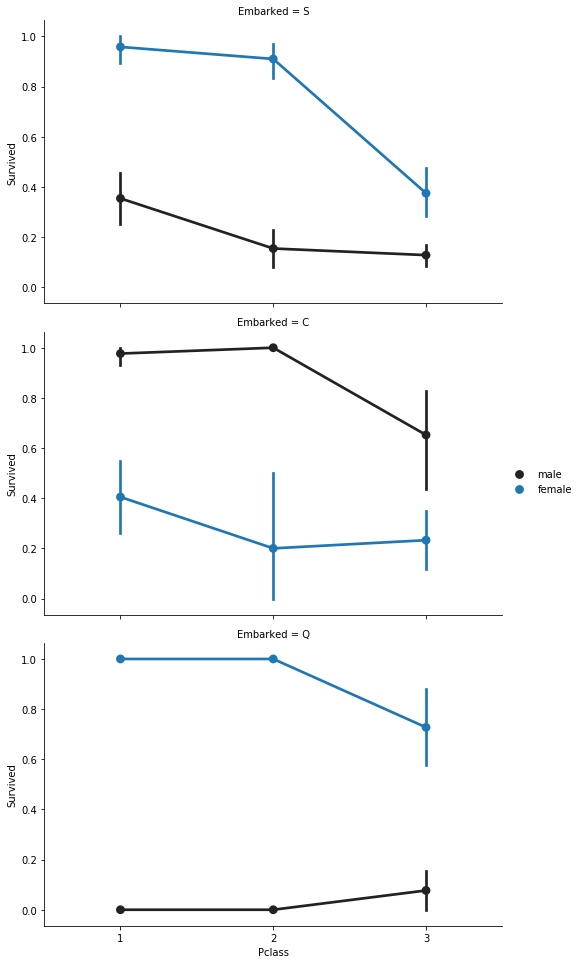

In [45]:

FacetGrid = sns.FacetGrid(df_train, row='Embarked',size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 
              'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

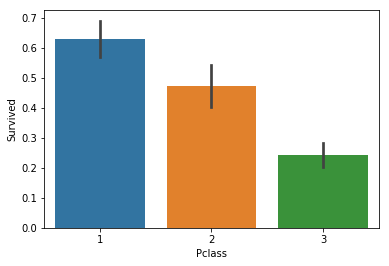

In [37]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


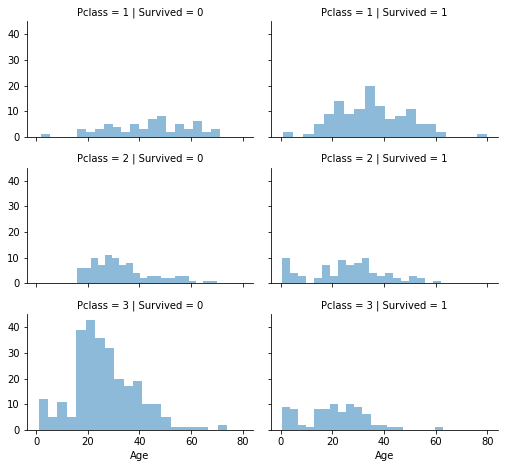

In [38]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [40]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

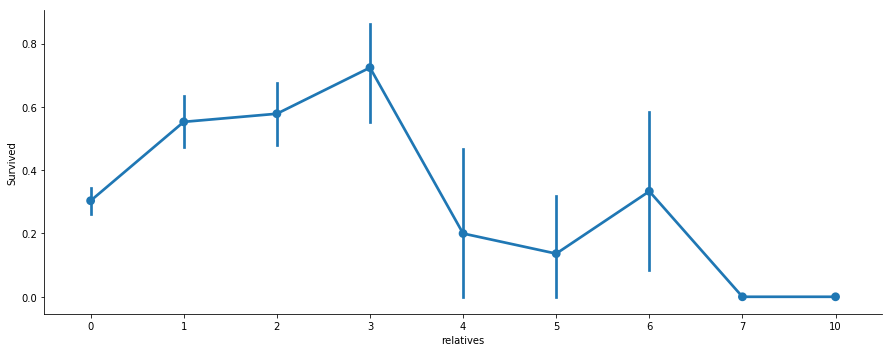

In [43]:
axes = sns.factorplot('relatives','Survived', 
                      data=df_train, aspect = 2.5, )

In [76]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

<font size="8" color="red"><b> model modify for data

In [417]:
from Titanic_model import data_modify

In [378]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

from farhad_DL.utility import missing_median, missing_default,missing_maxitration


df_train= pd.read_csv("data/Chapter7/Chapter7.1-titanic/train.csv", 
                      na_values=["NA","?"," "])
df_test = pd.read_csv("data/Chapter7/Chapter7.1-titanic/test.csv", na_values=["NA","?"])

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [379]:
df_train, df_test = data_modify(df_train, df_test)

In [380]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,0,3,0,0,1,0,0,0,8,1,1,0,6
1,1,1,1,0,1,0,3,1,3,3,1,0,5


In [125]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title', 'relatives', 'not_alone', 'Age_Class'],
      dtype='object')

<font size="8" color="red"><b> Machine learning

In [327]:
from sklearn.metrics import accuracy_score, mean_absolute_error , confusion_matrix
import numpy as np
from farhad_DL.utility import plot_confusion_matrix
from Titanic_model import model_ML
from Titanic_model import draw_model

In [328]:
score_test = {}
score_train = {}

def draw_model(title, model):
    score_test[title], score_train[title], sce = model_ML(model,x_train, x_test, y_train, y_test)
    print("Final Score of train:",score_train[title])
    print("Final Score of test:",score_test[title])
    plot_confusion_matrix(sce, ['dead','live'], title)

In [329]:
from farhad_DL.utility import to_xy
from farhad_DL.utils import TimeSummary, plot_training_summary

from sklearn.model_selection import train_test_split

In [330]:
#cdf_train = df_train
y = df_train['Survived']
x = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
             'Embarked', 'Deck', 'Title', 'relatives', 'not_alone', 'Age_Class']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=20)

# xgboost

Final Score of train: (0.8, 0.2, 0.568)
Final Score of test: (0.8565022421524664, 0.14349775784753363, 0.474)


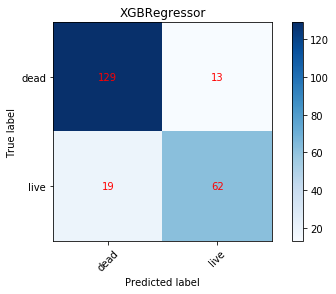

In [356]:
from xgboost import XGBRegressor,XGBClassifier

model_xgb = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

title= "XGBRegressor"
draw_model(title, model_xgb)

Final Score of train: (0.75, 0.25, 0.864)
Final Score of test: (0.8385650224215246, 0.16143497757847533, 0.839)


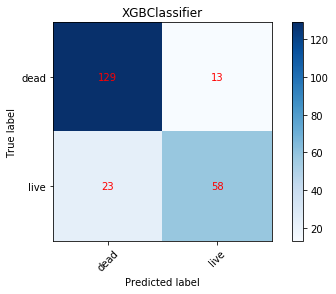

In [333]:
model_xgb_2 = XGBClassifier(n_estimators=100,early_stopping_rounds='auto',verbose=True)
title= "XGBClassifier"
draw_model(title, model_xgb_2)

# Random Forest Classifier

Final Score of train: (0.9, 0.1, 0.93)
Final Score of test: (0.8116591928251121, 0.18834080717488788, 0.812)


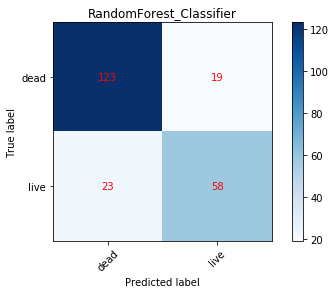

In [334]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40,random_state=20)

title = 'RandomForest_Classifier'
draw_model(title, model)

## RandomForest_Regrassior

Final Score of train: (0.9, 0.1, 0.755)
Final Score of test: (0.8116591928251121, 0.18834080717488788, 0.376)


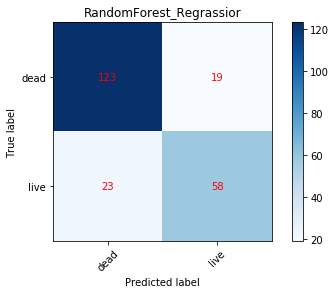

In [346]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest = RandomForestRegressor(n_estimators=40,random_state=20)

title = 'RandomForest_Regrassior'
draw_model(title, model_RandomForest)

# Stochastic Gradient Descent (SGD):

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Final Score of train: (0.6, 0.4, 0.719)
Final Score of test: (0.7533632286995515, 0.24663677130044842, 0.753)


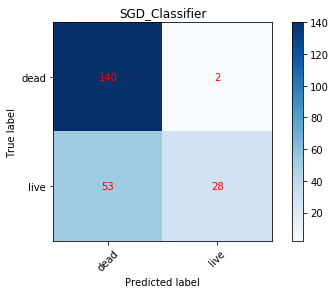

In [336]:
from sklearn.linear_model import SGDClassifier,SGDRegressor
model = SGDClassifier(max_iter=5, tol=None,random_state=42)

title = 'SGD_Classifier'
draw_model(title, model)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Final Score of train: (0.675, 0.325, 0.349)
Final Score of test: (0.7847533632286996, 0.21524663677130046, 0.322)


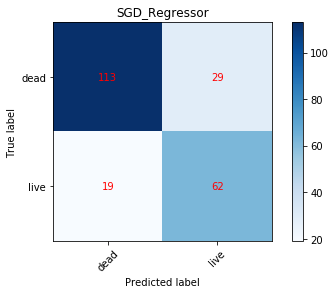

In [337]:
model = SGDRegressor(max_iter=5, tol=None)

title = 'SGD_Regressor'
draw_model(title, model)

# Logistic Regression:

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Score of train: (0.725, 0.275, 0.817)
Final Score of test: (0.8295964125560538, 0.17040358744394618, 0.83)


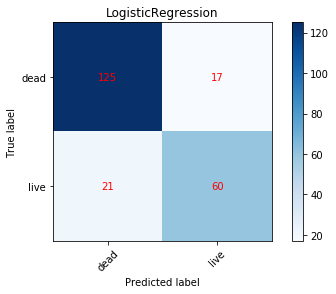

In [338]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=20)
title="Logistic_Regression"
draw_model("LogisticRegression", model)

# K Nearest Neighbor:

Final Score of train: (0.7, 0.3, 0.868)
Final Score of test: (0.7668161434977578, 0.23318385650224216, 0.767)


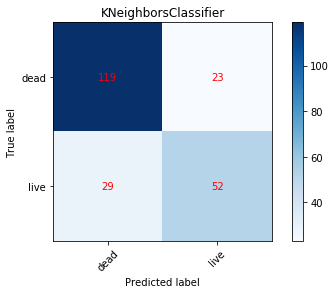

In [339]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
title="KNeighborsClassifier"
draw_model(title, model)

# Gaussian Naive Bayes:

Final Score of train: (0.7, 0.3, 0.868)
Final Score of test: (0.7668161434977578, 0.23318385650224216, 0.767)


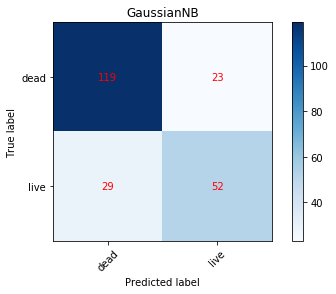

In [340]:
from sklearn.naive_bayes import GaussianNB
modle = GaussianNB()
title="GaussianNB"
draw_model(title, model)

# Perceptron:

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Final Score of train: (0.725, 0.275, 0.787)
Final Score of test: (0.8071748878923767, 0.19282511210762332, 0.807)


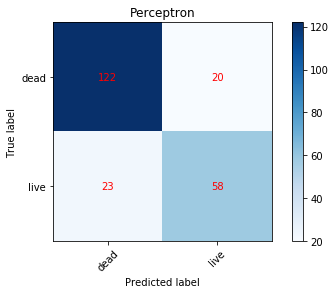

In [341]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=20)
title = "Perceptron"
draw_model(title, model)

# Linear Support Vector Machine:

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Final Score of train: (0.725, 0.275, 0.805)
Final Score of test: (0.8340807174887892, 0.16591928251121077, 0.834)


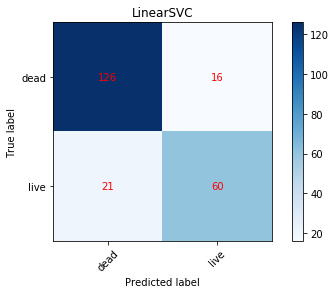

In [342]:
from sklearn.svm import LinearSVC
model_11 = LinearSVC()
title= "LinearSVC"
draw_model(title, model_11)

# Decision Tree:

Final Score of train: (0.875, 0.125, 0.93)
Final Score of test: (0.820627802690583, 0.17937219730941703, 0.821)


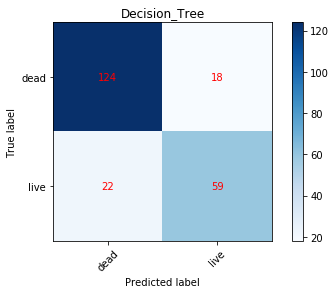

In [415]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
title="Decision_Tree"
draw_model(title, model_DecisionTree)

In [416]:
accuracytr = []
losstr = []

for i in score_train.values():
    accuracytr.append(i[0])
    losstr.append(i[1])
ML = []    
for i in score_train.keys():
    ML.append(i)

accuracyTe = []
lossTe = []
for i in score_test.values():
    accuracyTe.append(i[0])
    lossTe.append(i[1])
    
df_score = pd.DataFrame()
df_score["name_ML"] = ML
df_score["train_accuracy"] = accuracytr
df_score["train_loss"] = losstr
df_score["test_accuracy"] = accuracyTe
df_score["test_loss"] = lossTe
df_score = df_score.sort_values('test_accuracy',ascending=False)
df_score.head(len(df_score))

,name_ML,train_accuracy,train_loss,test_accuracy,test_loss
0,XGBRegressor,0.800,0.200,0.856502,0.143498
1,XGBClassifier,0.750,0.250,0.838565,0.161435
10,LinearSVC,0.725,0.275,0.834081,0.165919
6,LogisticRegression,0.725,0.275,0.829596,0.170404
11,Decision_Tree,0.875,0.125,0.820628,0.179372
2,RandomForest_Classifier,0.900,0.100,0.811659,0.188341
3,RandomForest_Regrassior,0.900,0.100,0.811659,0.188341
9,Perceptron,0.725,0.275,0.807175,0.192825
5,SGD_Regressor,0.675,0.325,0.784753,0.215247
7,KNeighborsClassifier,0.700,0.300,0.766816,0.233184


In [349]:
df_score.to_csv('data/score_ML_titanic_data.csv')

<font size="8" color="red"><b>test data

In [381]:
passengerid = df_test["PassengerId"]
df_test.drop("PassengerId", axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,3,0,0,0,0,0,2,8,1,0,1,15
1,3,1,0,1,0,0,0,8,3,1,0,18
2,2,0,0,0,0,1,2,8,1,0,1,12
3,3,0,0,0,0,1,0,8,1,0,1,9
4,3,1,0,1,1,1,0,8,3,2,0,6


In [382]:
df_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,0,3,0,0,1,0,0,0,8,1,1,0,6


In [375]:
pred_RF = np.round(model_RandomForest.predict(df_test))
pred_DT = np.round(model_DecisionTree.predict(df_test))
pred_XGB = np.round(model_xgb.predict(df_test),0)
pred_XGB = pred_XGB.astype(int)

In [376]:
df_pred = pd.DataFrame()
df_pred['RandomForest']=pred_RF
df_pred['DecisionTree']=pred_DT
df_pred['XGB']=pred_XGB
df_pred.head(3)

,RandomForest,DecisionTree,XGB
0,0.0,0,0
1,0.0,0,0
2,0.0,0,0


# ready for kaggle:

In [391]:
df_kaggle = pd.DataFrame({'PassengerId':passengerid,'Survived':pred_XGB})
df_kaggle.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [394]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [395]:
df_kaggle.to_csv('data/Chapter7/Chapter7.1-titanic/Titanic Predictions 1.csv',index=False)

# with cross_validation: